# WrestlerDataSet

### The dataset

In [209]:
import pandas as pd
import numpy as np

# Create a random seed for reproducibility
np.random.seed(0)

# Sample data
data = {
    "Wrestler": [f"Wrestler {i+1}" for i in range(50)],
    "Age": np.random.randint(20, 40, size=50).astype(float),
    "Weight": np.random.randint(180, 300, size=50).astype(float),
    "Height": np.random.randint(65, 80, size=50).astype(float),
    "Wins": np.random.randint(0, 100, size=50).astype(float),
    "Losses": np.random.randint(0, 50, size=50).astype(float),
    "Rank": np.random.randint(1, 10, size=50).astype(float)
}

# Introduce null values and outliers
data['Age'][5] = np.nan
data['Weight'][10] = 500  # Outlier
data['Wins'][20] = np.nan
data['Losses'][30] = -10  # Invalid
data['Rank'][40] = 20  # Outlier

# Create DataFrame
wrestlers_df = pd.DataFrame(data)

# Display the DataFrame
print(wrestlers_df.head())
print(wrestlers_df.dtypes)

     Wrestler   Age  Weight  Height  Wins  Losses  Rank
0  Wrestler 1  32.0   284.0    66.0  86.0    19.0   8.0
1  Wrestler 2  35.0   296.0    70.0  43.0    33.0   6.0
2  Wrestler 3  20.0   197.0    74.0  11.0    40.0   4.0
3  Wrestler 4  23.0   259.0    68.0   2.0    32.0   5.0
4  Wrestler 5  23.0   184.0    65.0  51.0    36.0   6.0
Wrestler     object
Age         float64
Weight      float64
Height      float64
Wins        float64
Losses      float64
Rank        float64
dtype: object


Above mentioned is a randomly generated dataset.
Given are wrestlers and their career statistics.
The goal is to see how age,weight and height effects the wins.

The units for the columns in the dataset are as follows:
Weight: Pounds (lbs)
Height: Inches (in)


### Looking For Outliers

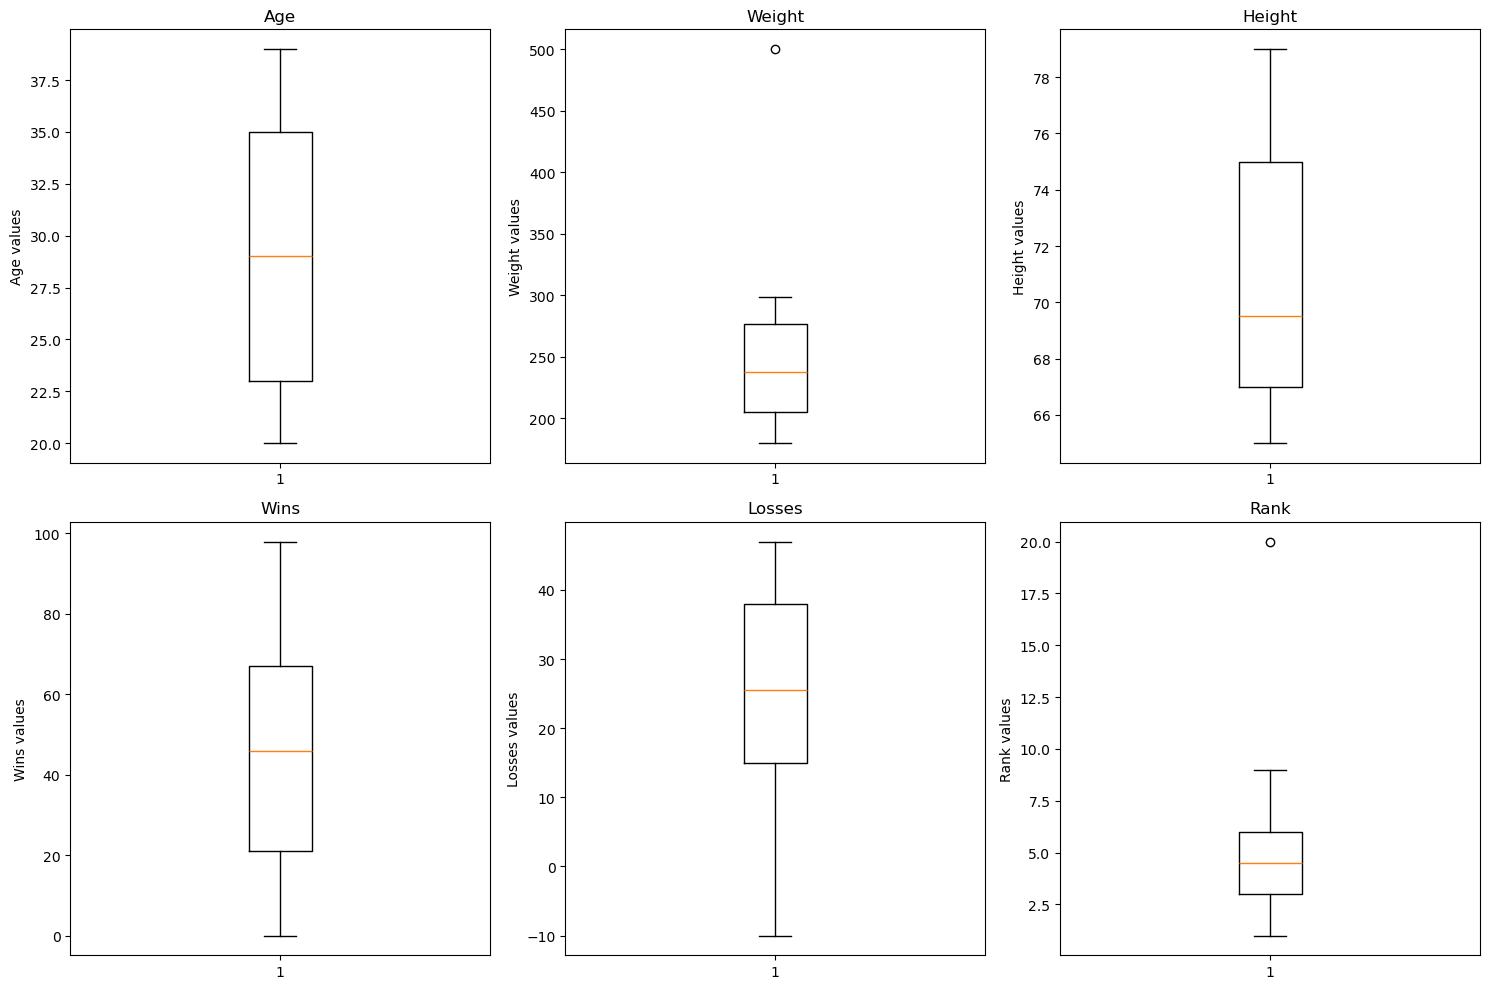

In [210]:
numerical_columns=['Age', 'Weight', 'Height', 'Wins', 'Losses', 'Rank']
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical_columns):
    plt.subplot(2,3,i+1)
    plt.boxplot(x=wrestlers_df[feature].dropna())
    plt.title(feature)
    plt.ylabel(feature+' values')
plt.tight_layout()
plt.show()

Using a box plot for all the features we can now see the outliers that are present in the Rank and Weight values.

### Checking For Null Values

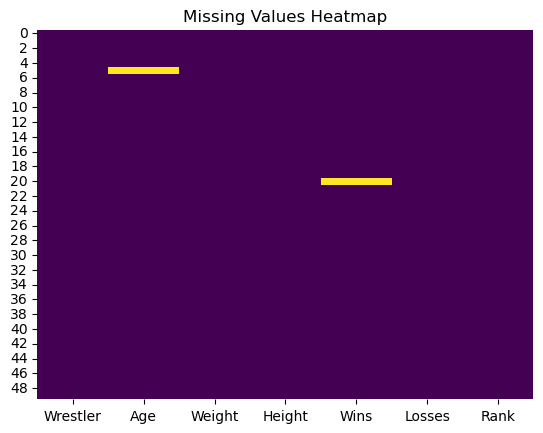

In [211]:
#MORE TIPS
sns.heatmap(wrestlers_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [212]:
for _ in wrestlers_df.columns:
    print(f"{_}\t{wrestlers_df[str(_)].isna().sum()}")

Wrestler	0
Age	1
Weight	0
Height	0
Wins	1
Losses	0
Rank	0


## Cleaning the Data

In [213]:
wrestlers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,49.0,29.285714,6.698881,20.0,23.0,29.0,35.0,39.0
Weight,50.0,244.360000,52.191469,180.0,205.0,238.0,277.0,500.0
Height,50.0,71.040000,4.746470,65.0,67.0,69.5,75.0,79.0
Wins,49.0,45.693878,28.685946,0.0,21.0,46.0,67.0,98.0
Losses,50.0,25.300000,14.595568,-10.0,15.0,25.5,38.0,47.0
Rank,50.0,5.060000,3.285155,1.0,3.0,4.5,6.0,20.0


In [214]:
wrestlers_df.fillna(wrestlers_df['Age'].mean(),inplace=True)


In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

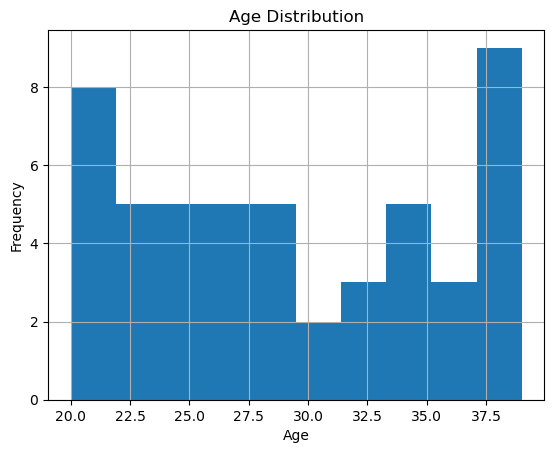

In [216]:
wrestlers_df['Age'].hist(bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

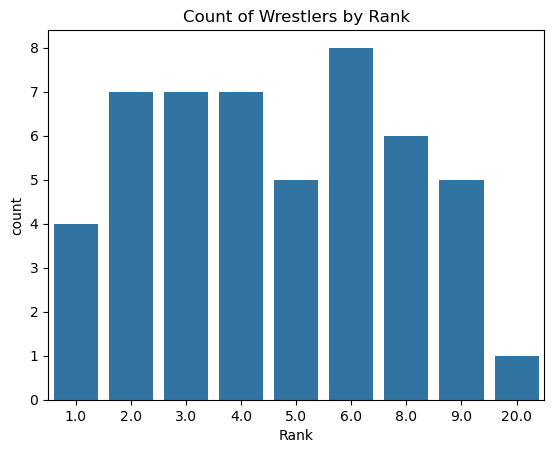

In [217]:
sns.countplot(x='Rank', data=wrestlers_df)
plt.title("Count of Wrestlers by Rank")
plt.show()

There is a rank here that is 20. This is most likely one of the outliers.

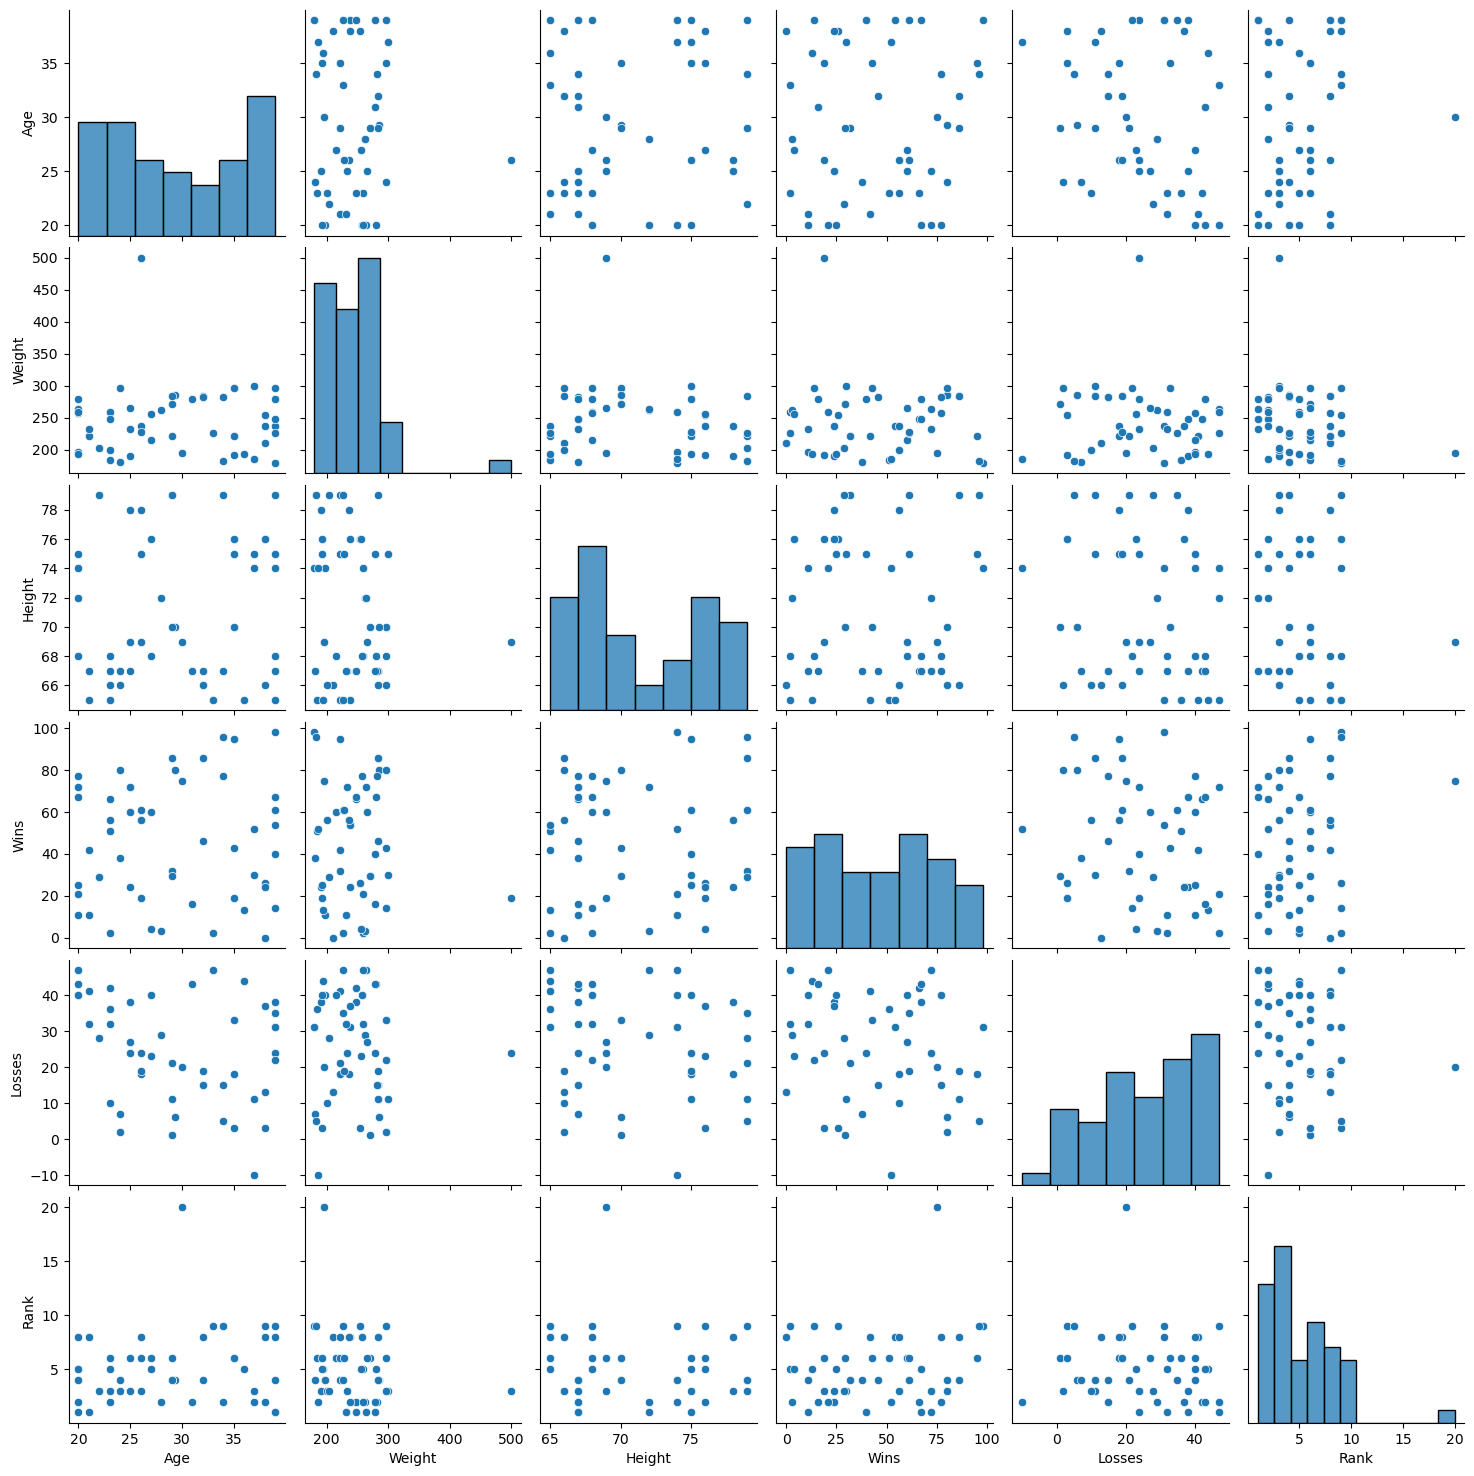

In [218]:
sns.pairplot(wrestlers_df)

Nothing easily noticable. However there seems to be around 1 outlier in the plots.
Let us check it out.

In [219]:
# Example of handling outliers in the Weight column
Q1 = wrestlers_df['Weight'].quantile(0.25)
Q3 = wrestlers_df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the median
wrestlers_df['Weight'] = np.where(
    (wrestlers_df['Weight'] < lower_bound) | (wrestlers_df['Weight'] > upper_bound),
    wrestlers_df['Weight'].median(),
    wrestlers_df['Weight']
)

In [226]:
wrestlers_df.head()


,Wrestler,Age,Weight,Height,Wins,Losses,Rank
0,Wrestler 1,32.0,284.0,66.0,86.0,19.0,8.0
1,Wrestler 2,35.0,296.0,70.0,43.0,33.0,6.0
2,Wrestler 3,20.0,197.0,74.0,11.0,40.0,4.0
3,Wrestler 4,23.0,259.0,68.0,2.0,32.0,5.0
4,Wrestler 5,23.0,184.0,65.0,51.0,36.0,6.0


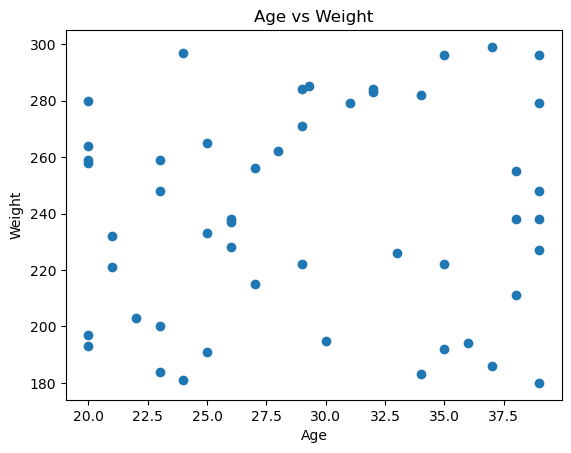

In [221]:
plt.scatter(wrestlers_df['Age'], wrestlers_df['Weight'])
plt.title("Age vs Weight")
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

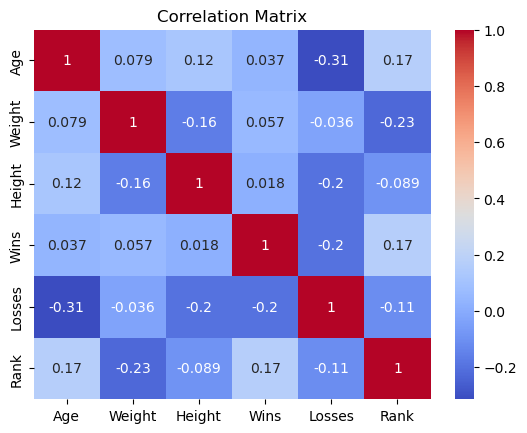

In [222]:
numerical_features = wrestlers_df.select_dtypes(include=[np.number])
correlation = numerical_features.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [223]:
wrestlers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50.0,29.285714,6.630172,20.0,23.25,29.0,35.0,39.0
Weight,50.0,239.120000,36.919460,180.0,205.00,238.0,269.5,299.0
Height,50.0,71.040000,4.746470,65.0,67.00,69.5,75.0,79.0
Wins,50.0,45.365714,28.486392,0.0,21.75,44.5,67.0,98.0
Losses,50.0,25.300000,14.595568,-10.0,15.00,25.5,38.0,47.0
Rank,50.0,5.060000,3.285155,1.0,3.00,4.5,6.0,20.0
